In [194]:
#!pip install arabicstemmer
#!pip install farasa
#!pip install arabic_reshaper 
#!pip install buckwalter
#!pip install lang-trans
#!pip install pybuckwalter
#!pip install pyarabic

In [1]:
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
import arabicstemmer
#from camel_tools.utils.normalize import normalize
from arabic_reshaper import reshape
import farasa
#from farasa.normalization import FarasaNormalizer

import pyarabic.araby as araby

nltk.download('stopwords')

from nltk.corpus import stopwords
arabic_stopwords = stopwords.words('arabic')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yazan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv("translated_sms without cleaning.csv", encoding='utf-8')

FileNotFoundError: [Errno 2] No such file or directory: 'translated_sms without cleaning.csv'

In [ ]:
df.iloc[100:120,:]

In [198]:
df.shape

(1494, 2)

In [ ]:
counts = df.label.value_counts()
print(f"Number of dialect classes: {df.label.nunique()}")
counts_df = pd.DataFrame(counts.to_dict().items(), columns=["label", "count"])
sns.barplot(data = counts_df, x="label", y="count", order=counts_df['label']);

In [199]:
def check(df):
    """
    This function takes a DataFrame as input and returns a DataFrame containing information about the columns of the DataFrame.
    """
    l=[]
    # Get the column names of the input DataFrame
    columns=df.columns
    
    # Iterate through each column
    for col in columns:
        # Get the data type of the current column
        dtypes=df[col].dtypes
        # Get the number of unique values in the current column
        nunique=df[col].nunique()
        # Get the number of missing values in the current column
        sum_null=df[col].isnull().sum()
        # Get the proportion of missing values in the current column
        sum_mean = df[col].isnull().mean()
        l.append([col,dtypes,nunique,sum_null,sum_mean])
    # Create a DataFrame from the list of column information
    df_check=pd.DataFrame(l)
    # Set the column names of the new DataFrame
    df_check.columns=['column','dtypes','nunique','sum_null','sum_mean']
    # Return the new DataFrame
    return df_check

In [200]:
check(df)

,column,dtypes,nunique,sum_null,sum_mean
0,sms,object,1368,0,0.0
1,label,int64,2,0,0.0


In [201]:
df.duplicated().sum()

126

In [202]:
df = df.drop_duplicates()

In [203]:
df.shape

(1368, 2)

In [204]:
# Check for missing values and remove or fill them
null_counts = df.isnull().sum()
if null_counts.any():
    # If there are any null values, remove the rows or columns that contain them
    df.dropna(inplace=True)
    # Alternatively, fill the null values with the column mean
    # df.fillna(df.mean(), inplace=True)

# Tokenize the words and remove stop words
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('arabic'))
df['sms'] = df['sms'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word not in stop_words]))

# Stem the words to remove common affixes
stemmer = SnowballStemmer('arabic')
df['sms'] = df['sms'].apply(lambda x: ' '.join([stemmer.stem(word) for word in word_tokenize(x)]))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yazan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yazan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [205]:
df

,sms,label
0,ممنوع تصوير . يرجى اعاد ارسال .,0
1,شراء بيض واحد da .. please : ),0
2,`` شيء ! NORE IKNO DOSISCOUNT ! SHITINNIT ``,0
3,احتل طاول انتظار شجر,0
4,خير انت صلاح جد .. لذل اجاز يوم .,0
...,...,...
1489,جيد.لنشكر له.يرجى اكمال دواء.لديك كثير ماء.واس...,0
1490,! تاخذ دروس عمل ureابدء ..,0
1491,تقلق.ساشتر شرايط اختبار اباض ارسل اليك.ل تحصل ...,0
1492,غاب مكالم لان كنت اصرخ Scrappy.مشتاق لك.ل استط...,0


In [206]:
def normalize_arabic_text(text):
    # normalize hamza and alef
    text = araby.strip_tashkeel(text) #حذف الحركات كلها بما فيها الشدة
    text = araby.normalize_hamza(text) # تنميط أشكال الهمزة المختلفة
    return text

In [207]:
df['sms'] = df['sms'].apply(normalize_arabic_text)

In [208]:
df

,sms,label
0,ممنوع تصوير . يرجى اعاد ارسال .,0
1,شراء بيض واحد da .. please : ),0
2,`` شيء ! NORE IKNO DOSISCOUNT ! SHITINNIT ``,0
3,احتل طاول انتظار شجر,0
4,خير انت صلاح جد .. لذل اجاز يوم .,0
...,...,...
1489,جيد.لنشكر له.يرجى اكمال دواء.لديك كثير ماء.واس...,0
1490,! تاخذ دروس عمل ureابدء ..,0
1491,تقلق.ساشتر شرايط اختبار اباض ارسل اليك.ل تحصل ...,0
1492,غاب مكالم لان كنت اصرخ Scrappy.مشتاق لك.ل استط...,0


In [209]:
import nltk
nltk.download('punkt')

def tokenize_arabic_text(text):
    tokens = nltk.word_tokenize(text)
    return tokens


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yazan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [210]:
df['sms'] = df['sms'].apply(tokenize_arabic_text)

In [211]:
df

,sms,label
0,"[ممنوع, تصوير, ., يرجى, اعاد, ارسال, .]",0
1,"[شراء, بيض, واحد, da, .., please, :, )]",0
2,"[``, شيء, !, NORE, IKNO, DOSISCOUNT, !, SHITIN...",0
3,"[احتل, طاول, انتظار, شجر]",0
4,"[خير, انت, صلاح, جد, .., لذل, اجاز, يوم, .]",0
...,...,...
1489,"[جيد.لنشكر, له.يرجى, اكمال, دواء.لديك, كثير, م...",0
1490,"[!, تاخذ, دروس, عمل, ureابدء, ..]",0
1491,"[تقلق.ساشتر, شرايط, اختبار, اباض, ارسل, اليك.ل...",0
1492,"[غاب, مكالم, لان, كنت, اصرخ, Scrappy.مشتاق, لك...",0


In [212]:
import re

def remove_english_text(text_list):
    # join the list of strings into a single string
    text = ' '.join(text_list)
    # define pattern to match English words
    english_pattern = re.compile(r'[a-zA-Z]+')
    # replace English words with empty string
    text = re.sub(english_pattern, '', text)
    # split the string back into a list of strings
    text_list = text.split()
    return text_list


In [213]:
df['sms'] = df['sms'].apply(remove_english_text)

In [214]:
df

,sms,label
0,"[ممنوع, تصوير, ., يرجى, اعاد, ارسال, .]",0
1,"[شراء, بيض, واحد, .., :, )]",0
2,"[``, شيء, !, !, ``]",0
3,"[احتل, طاول, انتظار, شجر]",0
4,"[خير, انت, صلاح, جد, .., لذل, اجاز, يوم, .]",0
...,...,...
1489,"[جيد.لنشكر, له.يرجى, اكمال, دواء.لديك, كثير, م...",0
1490,"[!, تاخذ, دروس, عمل, ابدء, ..]",0
1491,"[تقلق.ساشتر, شرايط, اختبار, اباض, ارسل, اليك.ل...",0
1492,"[غاب, مكالم, لان, كنت, اصرخ, .مشتاق, لك.ل, است...",0


In [215]:
import string

def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    if isinstance(text, list):
        text = [t.translate(translator) for t in text]
    else:
        text = text.translate(translator)
    return text


df['sms'] = df['sms'].apply(remove_punctuation)

In [216]:
df

,sms,label
0,"[ممنوع, تصوير, , يرجى, اعاد, ارسال, ]",0
1,"[شراء, بيض, واحد, , , ]",0
2,"[, شيء, , , ]",0
3,"[احتل, طاول, انتظار, شجر]",0
4,"[خير, انت, صلاح, جد, , لذل, اجاز, يوم, ]",0
...,...,...
1489,"[جيدلنشكر, لهيرجى, اكمال, دواءلديك, كثير, ماءو...",0
1490,"[, تاخذ, دروس, عمل, ابدء, ]",0
1491,"[تقلقساشتر, شرايط, اختبار, اباض, ارسل, اليكل, ...",0
1492,"[غاب, مكالم, لان, كنت, اصرخ, مشتاق, لكل, استطي...",0


In [217]:
import string

def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    # remove empty entries
    text = [t for t in text if t.strip()]
    # remove punctuation
    text = [t.translate(translator) for t in text]
    return text


In [218]:
df['sms'] = df['sms'].apply(remove_punctuation)


In [219]:
df

,sms,label
0,"[ممنوع, تصوير, يرجى, اعاد, ارسال]",0
1,"[شراء, بيض, واحد]",0
2,[شيء],0
3,"[احتل, طاول, انتظار, شجر]",0
4,"[خير, انت, صلاح, جد, لذل, اجاز, يوم]",0
...,...,...
1489,"[جيدلنشكر, لهيرجى, اكمال, دواءلديك, كثير, ماءو...",0
1490,"[تاخذ, دروس, عمل, ابدء]",0
1491,"[تقلقساشتر, شرايط, اختبار, اباض, ارسل, اليكل, ...",0
1492,"[غاب, مكالم, لان, كنت, اصرخ, مشتاق, لكل, استطي...",0


In [220]:
def remove_stopwords(words):
    filtered_words = [word for word in words if word.lower() not in arabic_stopwords]
    return filtered_words

df['sms'] = df['sms'].apply(remove_stopwords)


In [221]:
df[df['label'] == 1]

,sms,label
5,"[تريد, هاتف, فيد, جديد750, وقت, شبك, دقيقةنص, ...",1
6,"[ساخ, قرن, مستعد, اعيش, محل, ارسل, ردا, سماع, ...",1
7,"[تسوق, 10, 5, 500, استرل, نقد, 100, استرل, قسي...",1
8,"[ارتعش, غوغاء, مجموع, هالو, رسال, شعار, اضاف, ...",1
9,"[رايع, اولاد, صخذ, جول, 2007, مملك, متحدةاربح,...",1
...,...,...
1468,"[لقد, فزت, جايز, مضمون, قيم, 200, استرل, 1000,...",1
1471,"[يفت, الاو, لطلب, زهور, اتصال, عيد, ميلاد, 080...",1
1474,"[عاجل, اتصل, 09066612661, الخط, ارضيمكملك, 4, ...",1
1485,"[تريد, فيد, فيد, جديد, جديد, وقت, وقت, شبك, 15...",1


In [222]:
df['sms'] = df['sms'].apply(lambda x: ' '.join(x))

In [223]:
df

,sms,label
0,ممنوع تصوير يرجى اعاد ارسال,0
1,شراء بيض,0
2,شيء,0
3,احتل طاول انتظار شجر,0
4,خير انت صلاح جد لذل اجاز يوم,0
...,...,...
1489,جيدلنشكر لهيرجى اكمال دواءلديك كثير ماءواستمتع...,0
1490,تاخذ دروس عمل ابدء,0
1491,تقلقساشتر شرايط اختبار اباض ارسل اليكل تحصل ما...,0
1492,غاب مكالم لان كنت اصرخ مشتاق لكل استطيع انتظار...,0


In [224]:
import pandas as pd
import re

# Define a function to convert English numbers to Arabic
def convert_numbers(text):
    # Find all English numbers in the text using a regular expression
    english_numbers = re.findall(r'\d+', text)

    # Replace each English number with its Arabic equivalent
    arabic_text = text
    for num in english_numbers:
        arabic_num = ''
        for digit in num:
            arabic_num += chr(ord(digit) + 1584)
        arabic_text = arabic_text.replace(num, arabic_num)

    return arabic_text

In [225]:
df['sms'] = df['sms'].apply(convert_numbers)

In [227]:
df[df['label'] ==1]

,sms,label
5,تريد هاتف فيد جديد٧٥٠ وقت شبك دقيقةنص نصف سعر ...,1
6,ساخ قرن مستعد اعيش محل ارسل ردا سماع ستر ١٥٠ ك...,1
7,تسوق ١٠ ٥ ٥00 استرل نقد ١٠0 استرل قسيم سفر اتص...,1
8,ارتعش غوغاء مجموع هالو رسال شعار اضاف نغم غريب...,1
9,رايع اولاد صخذ جول ٢٠٠٧ مملك متحدةاربح تذاكر ك...,1
...,...,...
1468,لقد فزت جايز مضمون قيم ٢٠٠ استرل ١٠٠٠ استرل نق...,1
1471,يفت الاو لطلب زهور اتصال عيد ميلاد ٠٨٠٠ ٥٠٥٠٦٠...,1
1474,عاجل اتصل ٠٩٠٦٦٦١٢٦٦١ الخط ارضيمكملك ٤ ١٠٠٠٠ ا...,1
1485,تريد فيد فيد جديد جديد وقت وقت شبك ١٥٠ نصا مقا...,1


In [228]:
df.to_csv('cleaned_data.csv', encoding='utf-8-sig', index=False)

# Arabert

In [138]:
import transformers
import torch
import pandas as pd

# load the pre-trained AraBERT model
model_name = 'aubmindlab/bert-base-arabertv2'
tokenizer = transformers.AutoTokenizer.from_pretrained(model_name)
model = transformers.AutoModel.from_pretrained(model_name)

loading configuration file config.json from cache at C:\Users\yazan/.cache\huggingface\hub\models--aubmindlab--bert-base-arabertv2\snapshots\599b85458968e0cbad56126802f8328e649b3bec\config.json
Model config BertConfig {
  "_name_or_path": "aubmindlab/bert-base-arabertv2",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.25.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 64000
}

loading file vocab.txt from cache at C:\Users\yazan/.cache\huggingface\hub\models--aubmindlab--bert-base-arabertv2\snapshots\599b85458968e0cbad56126802f8328e649b3bec\v

In [139]:
df

,sms,label
0,ممنوع تصوير يرجى اعاد ارسال,0
1,شراء بيض,0
2,شيء,0
3,احتل طاول انتظار شجر,0
4,خير انت صلاح جد لذل اجاز يوم,0
...,...,...
1489,جيدلنشكر لهيرجى اكمال دواءلديك كثير ماءواستمتع...,0
1490,تاخذ دروس عمل ابدء,0
1491,تقلقساشتر شرايط اختبار اباض ارسل اليكل تحصل ما...,0
1492,غاب مكالم لان كنت اصرخ مشتاق لكل استطيع انتظار...,0


In [140]:
from sklearn.model_selection import train_test_split

# Your data (X) and corresponding labels (y)
X = df['sms']
y = df['label']

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shapes of the resulting sets
print("Training set shape: X={}, y={}".format(X_train.shape, y_train.shape))
print("Testing set shape: X={}, y={}".format(X_test.shape, y_test.shape))


Training set shape: X=(957,), y=(957,)
Testing set shape: X=(411,), y=(411,)


In [141]:
from arabert.preprocess import NEVER_SPLIT_TOKENS

In [142]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))
    !nvidia-smi

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: NVIDIA GeForce GTX 1060 with Max-Q Design
Mon Feb 27 02:07:55 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 528.33       Driver Version: 528.33       CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0  On |                  N/A |
| N/A   34C    P8     3W /  50W |   3516MiB /  6144MiB |      2%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+-------------------

In [143]:
import pandas as pd
import numpy as np
from typing import List
from tqdm import tqdm_notebook as tqdm
from sklearn.model_selection import train_test_split

In [144]:
class CustomDataset:
    def __init__(
        self,
        name: str,
        train: List[pd.DataFrame],
        test: List[pd.DataFrame],
        label_list: List[str],
    ):
        """Class to hold and structure datasets.

        Args:

        name (str): holds the name of the dataset so we can select it later
        train (List[pd.DataFrame]): holds training pandas dataframe with 2 columns ["text","label"]
        test (List[pd.DataFrame]): holds testing pandas dataframe with 2 columns ["text","label"]
        label_list (List[str]): holds the list  of labels
        """
        self.name = name
        self.train = train
        self.test = test
        self.label_list = label_list

In [145]:
# This will hold all the downloaded and structred datasets
all_datasets= []
DATA_COLUMN = "sms"
LABEL_COLUMN = "label"

In [146]:
df.columns = [DATA_COLUMN, LABEL_COLUMN]
print(df[LABEL_COLUMN].value_counts())

label_list_dialect = list(df[LABEL_COLUMN].unique())
print(label_list_dialect)

train_dialect, test_dialect = train_test_split(df, test_size=0.1, random_state=42, stratify=df[LABEL_COLUMN] )

print("Training length: ", len(train_dialect))
print("Testing length: ", len(test_dialect))

data_dialect = CustomDataset("Dialect", train_dialect, test_dialect, label_list_dialect)

0    728
1    640
Name: label, dtype: int64
[0, 1]
Training length:  1231
Testing length:  137


In [147]:
import numpy as np
import torch
import random
import matplotlib.pyplot as plt
import copy

from sklearn.metrics import (accuracy_score, classification_report,
                             confusion_matrix, f1_score, precision_score,
                             recall_score)
from torch.utils.data import DataLoader, Dataset
from transformers import (AutoConfig, AutoModelForSequenceClassification,
                          AutoTokenizer, BertTokenizer, Trainer,
                          TrainingArguments)
from transformers.data.processors.utils import InputFeatures

In [148]:
model_name = 'aubmindlab/bert-base-arabertv02' # we are going to use the twitter AraBERT since it has emojis and dialects


In [149]:
from arabert.preprocess import ArabertPreprocessor


In [150]:
arabic_prep = ArabertPreprocessor(model_name)

data_dialect.train[DATA_COLUMN] = data_dialect.train[DATA_COLUMN].apply(lambda x: arabic_prep.preprocess(x))
data_dialect.test[DATA_COLUMN] = data_dialect.test[DATA_COLUMN].apply(lambda x: arabic_prep.preprocess(x))  

In [151]:
list(data_dialect.train[DATA_COLUMN][0:10])

['خاص بيا حساب لعام 2004 078498 7 يظهر 786 نقط مكافء مستقرةلمطالب اتصال 08719180219 رمز معرف 45239 انتهاء صلاح 060505',
 'نقاء صداق يدور حول ابتسام قراء رسال معاد توج ابتسام فقط خلال رء اسمجود',
 'كنت افكر ذهاب 10 ذهاب 3 يمك تسرع 4 تتصل عندم تكو جاهز',
 'يمينو 1148 ثمحس كلن مشرق مبكر',
 'ممارس مستمر',
 'اسف اعتقد انه بام حصول اتصال ربم ساع ساعتينسوف ارسل رسال',
 'زلت اتحقق',
 '50 6 16 2',
 'حسن رايعل قبال راجل شارع شارع ادواردخلف ارض كريكيترن عندم ارا يوم',
 'ذهاب 4 اجتماع يوم']

In [152]:
tok = AutoTokenizer.from_pretrained(model_name, 
                                    do_lower_case=False, 
                                    do_basic_tokenize=True,
                                    never_split=NEVER_SPLIT_TOKENS)

loading configuration file config.json from cache at C:\Users\yazan/.cache\huggingface\hub\models--aubmindlab--bert-base-arabertv02\snapshots\c594996cdab128215ee28e51ba4aadf261c2ddd4\config.json
Model config BertConfig {
  "_name_or_path": "aubmindlab/bert-base-arabertv02",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.25.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 64000
}

loading file vocab.txt from cache at C:\Users\yazan/.cache\huggingface\hub\models--aubmindlab--bert-base-arabertv02\snapshots\c594996cdab128215ee28e51ba4aadf261c2ddd

Training Sentence Lengths: 


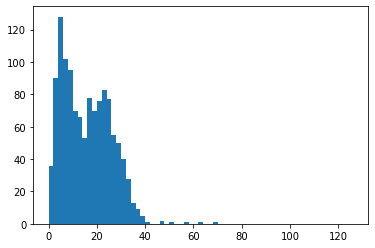

Testing Sentence Lengths: 


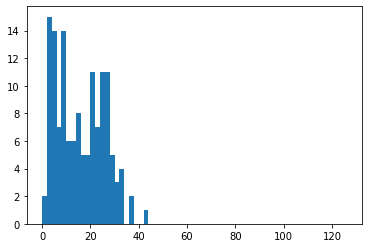

In [153]:
print("Training Sentence Lengths: ")
plt.hist([ len(tok.tokenize(sentence)) for sentence in data_dialect.train[DATA_COLUMN].to_list()],bins=range(0,128,2))
plt.show()

print("Testing Sentence Lengths: ")
plt.hist([ len(tok.tokenize(sentence)) for sentence in data_dialect.test[DATA_COLUMN].to_list()],bins=range(0,128,2))
plt.show()

In [154]:
max_len = 32


In [155]:
print("Truncated training sequences: ", sum([len(tok.tokenize(sentence)) > max_len for sentence in data_dialect.test[DATA_COLUMN].to_list()]))

print("Truncated testing sequences: ", sum([len(tok.tokenize(sentence)) > max_len for sentence in data_dialect.test[DATA_COLUMN].to_list()]))

Truncated training sequences:  5
Truncated testing sequences:  5


In [156]:
class ClassificationDataset(Dataset):
    def __init__(self, text, target, model_name, max_len, label_map):
        super(ClassificationDataset).__init__()
        """
        Args:
        text (List[str]): List of the training text
        target (List[str]): List of the training labels
        tokenizer_name (str): The tokenizer name (same as model_name).
        max_len (int): Maximum sentence length
        label_map (Dict[str,int]): A dictionary that maps the class labels to integer
        """
        self.text = text
        self.target = target
        self.tokenizer_name = model_name
        self.tokenizer = AutoTokenizer.from_pretrained(model_name, 
                                                       do_lower_case=False, 
                                                       do_basic_tokenize=True,
                                                       never_split=NEVER_SPLIT_TOKENS
)
        self.max_len = max_len
        self.label_map = label_map
      

    def __len__(self):
        return len(self.text)

    def __getitem__(self,item):
        text = str(self.text[item])
        text = " ".join(text.split())
        
        inputs = self.tokenizer(
            text,
            max_length=self.max_len,
            padding='max_length',
            truncation=True
        )      
        return InputFeatures(**inputs,label=self.label_map[self.target[item]])

In [157]:
label_map = { v:index for index, v in enumerate(data_dialect.label_list) }
print(label_map)

train_dataset = ClassificationDataset(
    data_dialect.train[DATA_COLUMN].to_list(),
    data_dialect.train[LABEL_COLUMN].to_list(),
    model_name,
    max_len,
    label_map
  )
test_dataset = ClassificationDataset(
    data_dialect.test[DATA_COLUMN].to_list(),
    data_dialect.test[LABEL_COLUMN].to_list(),
    model_name,
    max_len,
    label_map
  )

{0: 0, 1: 1}


loading configuration file config.json from cache at C:\Users\yazan/.cache\huggingface\hub\models--aubmindlab--bert-base-arabertv02\snapshots\c594996cdab128215ee28e51ba4aadf261c2ddd4\config.json
Model config BertConfig {
  "_name_or_path": "aubmindlab/bert-base-arabertv02",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.25.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 64000
}

loading file vocab.txt from cache at C:\Users\yazan/.cache\huggingface\hub\models--aubmindlab--bert-base-arabertv02\snapshots\c594996cdab128215ee28e51ba4aadf261c2ddd

In [158]:
print(next(iter(train_dataset)))


InputFeatures(input_ids=[2, 2561, 35572, 3725, 4967, 4320, 11129, 27635, 35340, 28, 4996, 8006, 214, 14092, 8069, 224, 14752, 411, 1219, 5113, 12787, 21815, 26163, 11313, 16898, 216, 14257, 13676, 3907, 16954, 216, 3], attention_mask=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], token_type_ids=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], label=1)


In [159]:
def model_init():
    return AutoModelForSequenceClassification.from_pretrained(model_name, return_dict=True, num_labels=len(label_map))

In [160]:
def compute_metrics(p): #p should be of type EvalPrediction
    preds = np.argmax(p.predictions, axis=1)
    assert len(preds) == len(p.label_ids)
    #print(classification_report(p.label_ids,preds))
    #print(confusion_matrix(p.label_ids,preds))
    macro_f1 = f1_score(p.label_ids,preds,average='macro')
    #macro_precision = precision_score(p.label_ids,preds,average='macro')
    #macro_recall = recall_score(p.label_ids,preds,average='macro')
    acc = accuracy_score(p.label_ids,preds)
    return {       
      'macro_f1' : macro_f1,
      'accuracy': acc
    }

In [161]:
def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic=False # turned from True to False
    torch.backends.cudnn.benchmark = False

In [162]:
training_args = TrainingArguments( 
    output_dir= "./train",    
    adam_epsilon = 1e-8,
    learning_rate = 2e-5,
    fp16 = False, # enable this when using V100 or T4 GPU
    per_device_train_batch_size = 16, # up to 64 on 16GB with max len of 128
    per_device_eval_batch_size = 128,
    gradient_accumulation_steps = 2, # use this to scale batch size without needing more memory
    num_train_epochs= 1,
    warmup_ratio = 0,
    do_eval = True,
    evaluation_strategy = 'epoch',
    save_strategy = 'epoch',
    load_best_model_at_end = True, # this allows to automatically get the best model at the end based on whatever metric we want
    metric_for_best_model = 'macro_f1',
    greater_is_better = True,
    seed = 25
  )

set_seed(training_args.seed)

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


In [163]:
trainer = Trainer(
    model = model_init(),
    args = training_args,
    train_dataset = train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
)

loading configuration file config.json from cache at C:\Users\yazan/.cache\huggingface\hub\models--aubmindlab--bert-base-arabertv02\snapshots\c594996cdab128215ee28e51ba4aadf261c2ddd4\config.json
Model config BertConfig {
  "_name_or_path": "aubmindlab/bert-base-arabertv02",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.25.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 64000
}

loading weights file pytorch_model.bin from cache at C:\Users\yazan/.cache\huggingface\hub\models--aubmindlab--bert-base-arabertv02\snapshots\c594996cdab128215ee28e5

In [164]:
trainer.train()


F:\Conda\lib\site-packages\transformers\optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 1231
  Num Epochs = 1
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 32
  Gradient Accumulation steps = 2
  Total optimization steps = 38
  Number of trainable parameters = 135194882


Epoch,Training Loss,Validation Loss,Macro F1,Accuracy
0,No log,0.144360,0.956015,0.956204


***** Running Evaluation *****
  Num examples = 137
  Batch size = 128
Saving model checkpoint to ./train\checkpoint-38
Configuration saved in ./train\checkpoint-38\config.json
Model weights saved in ./train\checkpoint-38\pytorch_model.bin


Training completed. Do not forget to share your model on huggingface.co/models =)


Loading best model from ./train\checkpoint-38 (score: 0.9560145547945205).


TrainOutput(global_step=38, training_loss=0.3003613823338559, metrics={'train_runtime': 19.4832, 'train_samples_per_second': 63.183, 'train_steps_per_second': 1.95, 'total_flos': 19996440207360.0, 'train_loss': 0.3003613823338559, 'epoch': 0.99})

In [166]:
label_map = {"label1": 0, "label2": 1}
inv_label_map = {v: k for k, v in label_map.items()}

trainer.model.config.label2id = label_map
trainer.model.config.id2label = inv_label_map

trainer.save_model("output_dir")
train_dataset.tokenizer.save_pretrained("output_dir")


Saving model checkpoint to output_dir
Configuration saved in output_dir\config.json
Model weights saved in output_dir\pytorch_model.bin
tokenizer config file saved in output_dir\tokenizer_config.json
Special tokens file saved in output_dir\special_tokens_map.json


('output_dir\\tokenizer_config.json',
 'output_dir\\special_tokens_map.json',
 'output_dir\\vocab.txt',
 'output_dir\\added_tokens.json',
 'output_dir\\tokenizer.json')

In [167]:
import pickle

# Save model
with open("output_dir.pkl", "wb") as f:
    pickle.dump(trainer.model, f)

# Save tokenizer
with open("output_dir.pkl", "wb") as f:
    pickle.dump(train_dataset.tokenizer, f)


In [168]:
import pickle

# Load model
with open("output_dir.pkl", "rb") as f:
    model = pickle.load(f)

# Load tokenizer
with open("output_dir.pkl", "rb") as f:
    tokenizer = pickle.load(f)


In [169]:
import numpy as np
import pandas as pd
import pickle
import re
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, classification_report

from transformers import pipeline
import more_itertools
from typing import List
from tqdm import tqdm


In [170]:
#!pip install more_itertools

In [171]:
class CustomDataset:
    def __init__(
        self,
        name: str,
        train: List[pd.DataFrame],
        test: List[pd.DataFrame],
        label_list: List[str],
    ):
        """Class to hold and structure datasets.

        Args:

        name (str): holds the name of the dataset so we can select it later
        train (List[pd.DataFrame]): holds training pandas dataframe with 2 columns ["text","label"]
        test (List[pd.DataFrame]): holds testing pandas dataframe with 2 columns ["text","label"]
        label_list (List[str]): holds the list  of labels
        """
        self.name = name
        self.train = train
        self.test = test
        self.label_list = label_list

In [172]:
DATA_COLUMN = "sms"
LABEL_COLUMN = "label"

In [173]:
df.columns = [DATA_COLUMN, LABEL_COLUMN]
print(df[LABEL_COLUMN].value_counts())

label_list_dialect = list(df[LABEL_COLUMN].unique())
print(label_list_dialect)

train_dialect, test_dialect = train_test_split(df, test_size=0.1, random_state=42, stratify=df[LABEL_COLUMN] )

print("Training length: ", len(train_dialect))
print("Testing length: ", len(test_dialect))

data_dialect = CustomDataset("Dialect", train_dialect, test_dialect, label_list_dialect)

0    728
1    640
Name: label, dtype: int64
[0, 1]
Training length:  1231
Testing length:  137


In [174]:

label_map = { v:index for index, v in enumerate(data_dialect.label_list) }
print(label_map)
inv_label_map = { v:k for k, v in label_map.items()}


{0: 0, 1: 1}


In [175]:
pred_df = pd.DataFrame([])
pred_df[DATA_COLUMN] = data_dialect.test[DATA_COLUMN].copy()
# max_len = 32

In [182]:
pipe = pipeline("text-classification", model="output_dir", device=0, return_all_scores =False) # max_length=max_len, truncation=True
preds = []
for s in tqdm(pred_df[DATA_COLUMN].to_list()):
    preds.append(pipe(s)[0]["label"])

loading configuration file output_dir\config.json
Model config BertConfig {
  "_name_or_path": "output_dir",
  "architectures": [
    "BertForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "label1",
    "1": "label2"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "label1": 0,
    "label2": 1
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "problem_type": "single_label_classification",
  "torch_dtype": "float32",
  "transformers_version": "4.25.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 64000
}

loading configuration file output_dir\config.json
Model config BertConfig {
  "_name_or_path": "output_dir",
  "architectures": 

In [183]:
pred_df["Prediction"] = preds
pred_df

,sms,Prediction
1457,علام تجار جديد ٧٢٥٠ ترتفع ٤ مزاد يوم مزاد مجا ...,label2
1420,عاجل يرجى اتصال ٠٩٠٦٣٤٦٣٣٠ خاص مجان ٤ عطل اسبا...,label2
1487,احصل استعداد تصرخ,label1
901,يجب اخطط فقط وصول لاحق ليل,label1
105,رسال قصيرة اعمى تاريخ ٤ ١ 2١م ابرد مملك متحدةت...,label2
...,...,...
961,تهان منح امداد اقراص مدمج هد غامض مضمو مكالم ٠...,label2
632,ارداعجب صوركان مثير جدا,label1
1004,عندم فعل دير فصل,label1
808,اسف ساتصل لاحق اجتماع,label1


In [186]:
pred_df['Prediction'] = pred_df['Prediction'].replace({"label1": 0, "label2": 1})


In [187]:
pred_df

,sms,Prediction
1457,علام تجار جديد ٧٢٥٠ ترتفع ٤ مزاد يوم مزاد مجا ...,1
1420,عاجل يرجى اتصال ٠٩٠٦٣٤٦٣٣٠ خاص مجان ٤ عطل اسبا...,1
1487,احصل استعداد تصرخ,0
901,يجب اخطط فقط وصول لاحق ليل,0
105,رسال قصيرة اعمى تاريخ ٤ ١ 2١م ابرد مملك متحدةت...,1
...,...,...
961,تهان منح امداد اقراص مدمج هد غامض مضمو مكالم ٠...,1
632,ارداعجب صوركان مثير جدا,0
1004,عندم فعل دير فصل,0
808,اسف ساتصل لاحق اجتماع,0


In [191]:
import os
...
if not os.path.exists('Models'):
    os.mkdir('Models')
plt.savefig("Models/"+modelname+'_results.png', dpi=150, bbox_inches='tight')


<Figure size 432x288 with 0 Axes>

Test accuracy = 0.9562043795620438
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        73
           1       0.94      0.97      0.95        64

    accuracy                           0.96       137
   macro avg       0.96      0.96      0.96       137
weighted avg       0.96      0.96      0.96       137



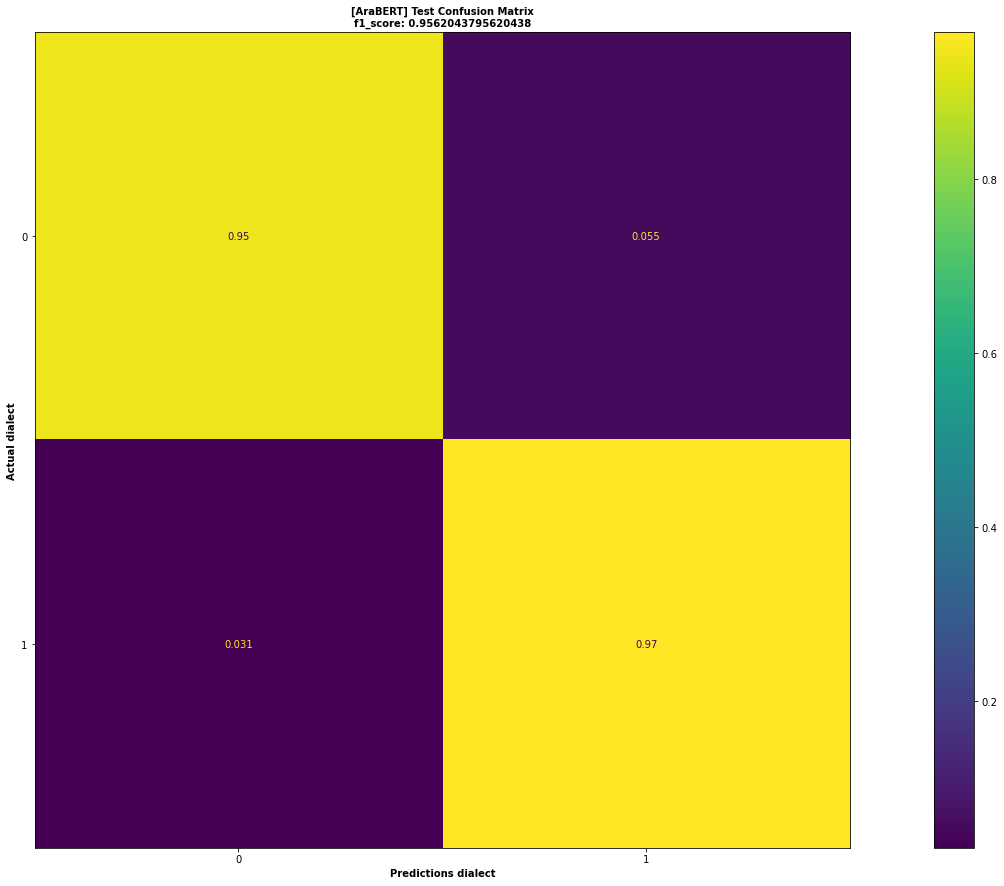

In [192]:
y_test = data_dialect.test[LABEL_COLUMN]
y_test_pred = pred_df["Prediction"]
modelname = "AraBERT"

# Check test accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print('Test accuracy = {}'.format(test_accuracy))

## Show results
print(classification_report(y_test, y_test_pred))

fig, ax = plt.subplots(1,1,figsize= (30,15))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_test_pred ,normalize ='true' ), display_labels=label_list_dialect).plot(ax=ax);
ax.set_title(f"[{modelname}] Test Confusion Matrix\nf1_score: {f1_score(y_test, y_test_pred, average='micro')}",font ={'weight' : 'bold'})
ax.set_xlabel('Predictions dialect',font ={'weight' : 'bold'})
ax.set_ylabel('Actual dialect',font ={'weight' : 'bold'})
plt.savefig("Models/"+modelname+'_results.png', dpi=150, bbox_inches='tight')
plt.show()

In [193]:
from sklearn.metrics import matthews_corrcoef

# load your predicted and actual labels
# calculate the Matthews Correlation Coefficient (MCC)
mcc = matthews_corrcoef(y_test, y_test_pred)

# print the MCC score
print("Matthews Correlation Coefficient (MCC):", mcc)


Matthews Correlation Coefficient (MCC): 0.9125891811214097
